We use the package to define the Voronoi cell of a specific lattice given by the matrix M

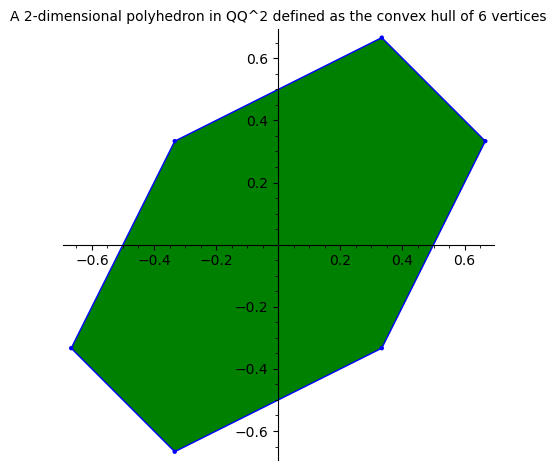

In [3]:
from VoronoiCellToolBox.voronoi_cell import VCell
VCell([[2, -1], [-1, 2]], range=2)

In this cell we test the function pos

In [4]:
from VoronoiCellToolBox.voronoi_cell import FromMatrixPositionToListPosition
print("FromMatrixPositionToListPosition(0, 1, 3) = ", pos(0, 1, 3))  # Returns 1
print("FromMatrixPositionToListPosition(1, 2, 3) = ", pos(1, 2, 3))  # Returns 4
print("FromMatrixPositionToListPosition(2, 2, 3) = ", pos(2, 2, 3))  # Returns 5

pos(0, 1, 3) =  1
pos(1, 2, 3) =  4
pos(2, 2, 3) =  5


Here we test the function `matrixify`
Converts a list of upper triangular entries into a $d \times d$ matrix.

In [5]:
from VoronoiCellToolBox.voronoi_cell import pos, matrixify
print("matrixify([3, 1, 5, 3, -1, 2], 3) = ", matrixify([3, 1, 5, 3, -1, 2], 3))


matrixify([3, 1, 5, 3, -1, 2], 3) =  [[3, 1, 5], [1, 3, -1], [5, -1, 2]]


The following function finds the linear inequality that a matrix must satisfy in order for a particular potential relevant vector nonRelevantVectors to not be relevant due to the conditions imposed by the list of relevant vectors neighborVectors 

Computes the equation of the wall in the secondary cone.

In [6]:
from VoronoiCellToolBox.voronoi_cell import eq_of_wall
rvecs = [(0, 1, 1), (1, 1, 1), (0, 0, 1)]
nrvec = [-1, 0, 0]
eq_of_wall(rvecs, nrvec, 3, False)

[2, 2, 2, 0, 0, 0]

The function reduce makes sure the Rational structures on our vectors are regularly updated to clear large denominators, bringing about an increase in performance

In [7]:
from VoronoiCellToolBox.voronoi_cell import lcmReduce
v = [31,3.2, 312]
lcmReduce([Rational(int(round(vi*10**9)),int(10**9)) for vi in v])

(155, 16, 1560)

The function gcdReduce makes sure the Integer structures on our vectors are regularly updated to clear large denominators, bringing about an increase in performance

In [8]:
from VoronoiCellToolBox.voronoi_cell import gcdReduce
gcdReduce([12, 24, 34])

[6, 12, 17]

The function gcd and GCD_list implement the Euclidean algorithm to compute the greatest common divisor of two integers or a list of integers


In [9]:
from VoronoiCellToolBox.voronoi_cell import gcd, GCD_list
print("gcd(48, 18) = ", gcd(48, 18))
print("GCD_list([102, 304, 54, 80]) = ", GCD_list([102, 304, 54, 80]))

gcd(48, 18) =  6
GCD_list([102, 304, 54, 80]) =  2


For a facet F of the voronoi cell V, this function computes the corresponding relevant vector.

In [10]:
from VoronoiCellToolBox.voronoi_cell import relevant_vector, VCell
#The following code prints the relevant vectors of each facet for d = 2
Q = [[2, -1], [-1, 2]]
VC = VCell(Q, range = 2)
list_facets = VC.facets()
for F in list_facets:
    print(F.vertices(), " - ", relevant_vector(Q, F))

(A vertex at (-1/3, -2/3), A vertex at (1/3, -1/3))  -  (0, -1)
(A vertex at (2/3, 1/3), A vertex at (1/3, 2/3))  -  (1, 1)
(A vertex at (1/3, 2/3), A vertex at (-1/3, 1/3))  -  (0, 1)
(A vertex at (2/3, 1/3), A vertex at (1/3, -1/3))  -  (1, 0)
(A vertex at (-1/3, -2/3), A vertex at (-2/3, -1/3))  -  (-1, -1)
(A vertex at (-1/3, 1/3), A vertex at (-2/3, -1/3))  -  (-1, 0)


For a metric matrix $Q$ we can compute the norm of any vector in $Z^d$ with the function $Qnorm(v, Q) = v^T Q v$.

In [12]:
from VoronoiCellToolBox.voronoi_cell import Qnorm
Qnorm([1, 2], [[1, 0], [0, 1]]) #Returns 10

5

For a metric matrix $Q$ we can compute the point that is equidistant to a collection of other points

In [2]:
from VoronoiCellToolBox.voronoi_cell import equidistantPoint
equidistantPoint([vector([1, 0]), vector([0, 1])], Matrix([[2, -1], [-1, 2]])) #Returns [1, 1]

(1, 1)

Computes a dictionary, exposing the relevant vectors associated with each vertex of P.
relevantVectorDictionary(P, Q)For each vertex v, the relevant vector relative to each facet incident to v is computed.

In [4]:
from VoronoiCellToolBox.voronoi_cell import VCell, relevantVectorDictionary

Q = [[3, -1, -1], [-1, 3, -1], [-1, -1, 3]]
P = VCell(Q, range = 2)
len(relevantVectorDictionary(P, Q))# Returns 24

24

The function secondary_cone computes a Polyhedron type object that describes all matrices Q' whose Voronoi cell has the same relevant vector structure as Q 

In [10]:
from VoronoiCellToolBox.voronoi_cell import secondary_cone, rayify
import itertools
Q = [[3, -1, -1], [-1, 3, -1], [-1, -1, 3]]
prv = [list(vec) for vec in itertools.product(range(-2, 3), repeat=3)]
prv.remove([0] * 3)
SC = secondary_cone(Q, range = 2)
rayify(SC)

[(1, -1, 0, 1, 0, 0),
 (1, 0, -1, 0, 0, 1),
 (0, 0, 0, 1, -1, 1),
 (0, 0, 0, 0, 0, 1),
 (0, 0, 0, 1, 0, 0),
 (1, 0, 0, 0, 0, 0)]

We also implement the pulling triangulation here

In [14]:
from VoronoiCellToolBox.voronoi_cell import VCell, pulling_triangulation
Q = [[3, -1, -1], [-1, 3, -1], [-1, -1, 3]]
P = VCell(Q, range=2)
len(pulling_triangulation(P))

34

The pulling triangulation will be handed off to Macaulay2 in order to compute the second moment polynomial expression with respect to the entries of $Q$